## Naive Bayes

In [5]:
import numpy as np
import json
from sklearn.feature_extraction import text

class Naive_Bayes():
    
    def __init__(self): 
        x = open('emails.txt').read()
        emails = json.loads(x)
        
        spam = emails["spam"]
        not_spam = emails["not_spam"]
        to_classify = emails["to_classify"]
        
        # Number of emails
        n_spam = len(spam)
        n_not_spam = len(not_spam)
        n_to_classify = len(to_classify)
        
        stop_words = text.ENGLISH_STOP_WORDS.union({'subject'})        
        
        # Form bag of words model using words used at least 10 times
        vectorizer = text.CountVectorizer(stop_words=stop_words,min_df=10)
        X = vectorizer.fit_transform(spam+not_spam+to_classify).toarray()
        
        # split word counts into separate matrices
        self.X_spam, self.X_not_spam, self.X_to_classify = X[:n_spam,:], X[n_spam:n_spam+n_not_spam,:], X[n_spam+n_not_spam:,:]

    def _likelihood_ratio(self, X_spam, X_not_spam): 
        
        totalNotSpam = X_not_spam.sum(axis=0) + 1
        totalSpam = X_spam.sum(axis=0) + 1
        
        probSpam = totalSpam / totalSpam.sum()
        probNotSpam = totalNotSpam / totalNotSpam.sum()
        
        return probSpam / probNotSpam

    def _priors_ratio(self, X_spam, X_not_spam): 

        pr = X_spam.sum() / X_not_spam.sum()
        return pr

    def classify_spam(self, likelihood_ratio, pratio, X_to_classify): 

        resolved = []
        for email in X_to_classify:
        # Compute likelihood ratio for Naive Bayes model
            power = likelihood_ratio ** email
            prodpower = power.prod()
            post = prodpower * pratio
            if post > .5:
                resolved.append('S')
            else:
                resolved.append('NS')
                        
        return resolved
    


## Image Compression with PCA

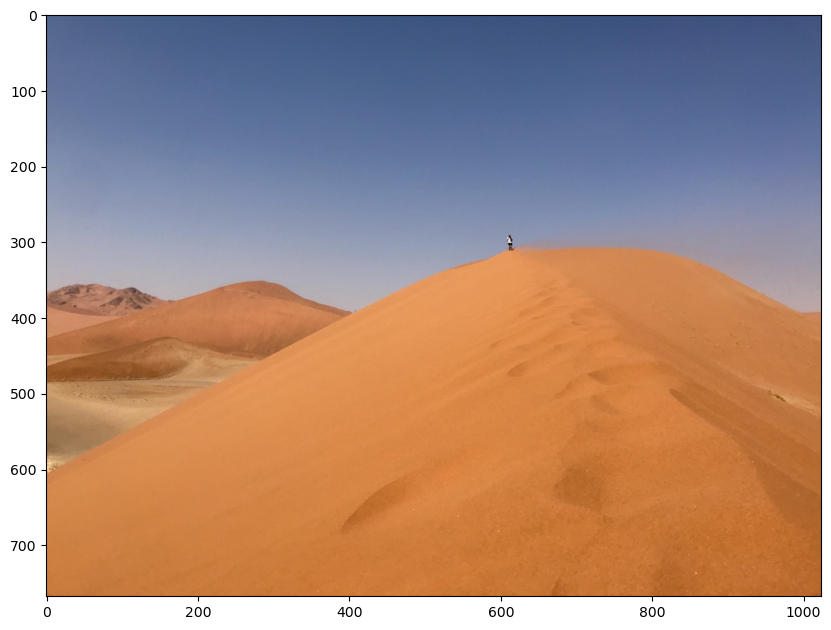

In [6]:
from matplotlib import pyplot as plt 

image = plt.imread("dunes.jpeg")/255.
fig = plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

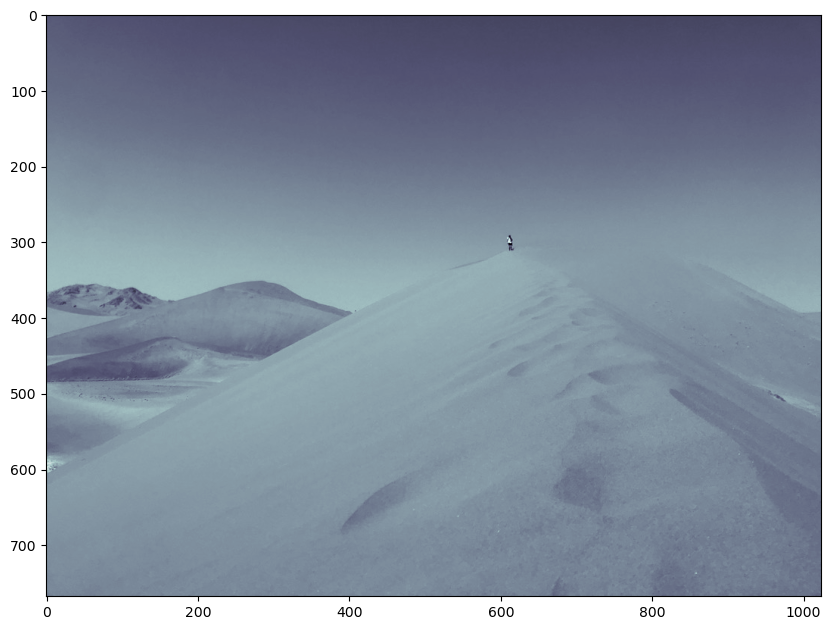

In [7]:
# Helper Function No need to modify
def rgb2gray(rgb):   
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

fig = plt.figure(figsize=(10, 10))
# plot several images
plt.imshow(rgb2gray(image), cmap=plt.cm.bone)
plt.show()

In [8]:
class ImgCompression(object):
    def __init__(self):
        pass

    def svd(self, X): 

        if X.ndim == 3:
            b, g, r    = X[:, :, 0], X[:, :, 1], X[:, :, 2]

            u_b, s_b, v_b = np.linalg.svd(b)
            u_g, s_g, v_g = np.linalg.svd(g)
            u_r, s_r, v_r = np.linalg.svd(r)

            U = np.dstack((u_b,u_g,u_r))
            S = np.dstack((s_b,s_g,s_r))
            V = np.dstack((v_b,v_g,v_r))
        else:
            U, S, V = np.linalg.svd(X)
        
        return U,S,V


    def rebuild_svd(self, U, S, V, k):

        if U.ndim == 3:
            Xrebuild = np.zeros((U.shape[0],V.shape[0],3))
            for i in range(3):
                val = np.dot(U[:,:k,i], np.dot(np.diag(S[0,:k,i]), V[:k,:,i]))
                Xrebuild[:,:,i] = val
        else:   
            Xrebuild = np.dot(U[:,:k],np.dot(np.diag(S[:k]),V[:k,:]))
        return Xrebuild
        
    def compression_ratio(self, X, k): 

        return (k * (X.shape[0] + X.shape[1]) + k) / (X.shape[0] * X.shape[1])


    def recovered_variance_proportion(self, S, k):

        if S.ndim == 3:
            recovered_var = np.zeros(3)
            for i in range(3):
                recovered_var[i] = np.sum(S[0,:k,i]**2) / np.sum(S[0,:,i]**2)
        else:
            recovered_var = np.sum(S[:k]**2) / np.sum(S**2)
        return recovered_var

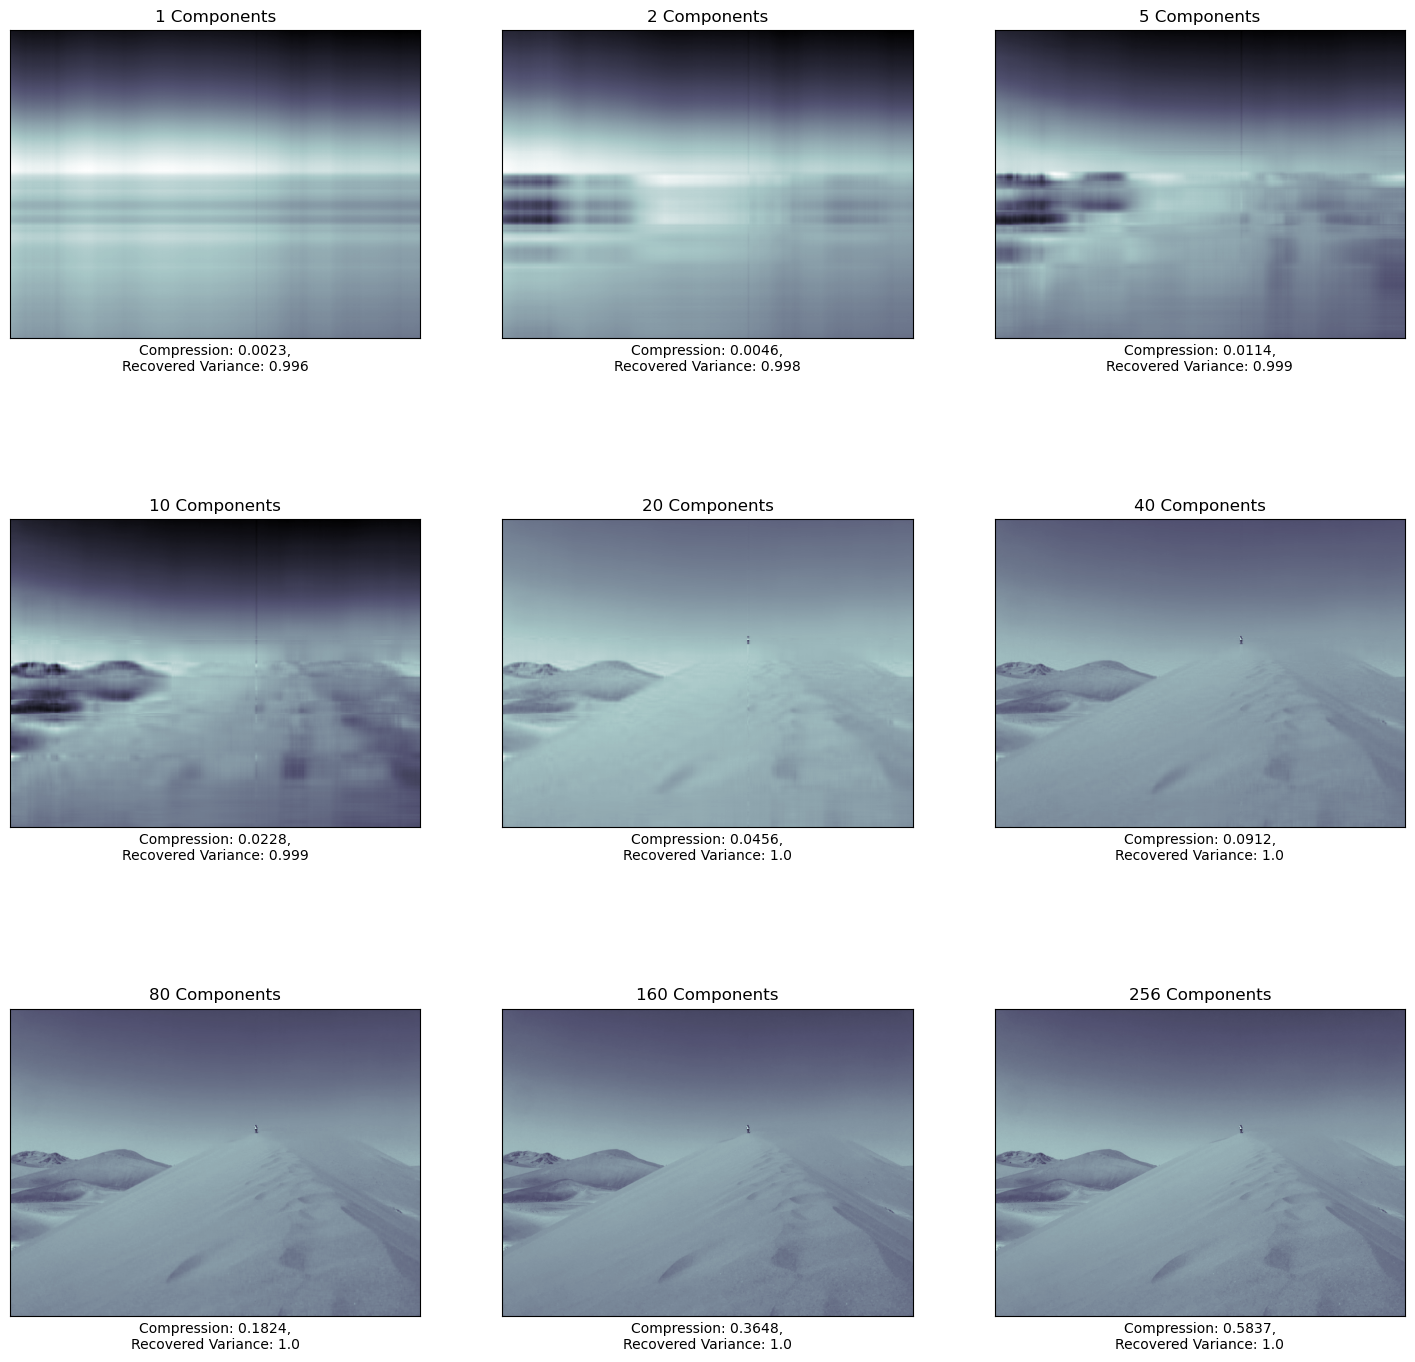

In [9]:
imcompression = ImgCompression()
bw_image = rgb2gray(image)
U, S, V = imcompression.svd(bw_image)
component_num = [1,2,5,10,20,40,80,160,256]

fig = plt.figure(figsize=(18, 18))

i=0
for k in component_num:
    img_rebuild = imcompression.rebuild_svd(U, S, V, k)
    c = np.around(imcompression.compression_ratio(bw_image, k), 4)
    r = np.around(imcompression.recovered_variance_proportion(S, k), 3)
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(img_rebuild, cmap=plt.cm.bone)
    ax.set_title(f"{k} Components")
    ax.set_xlabel(f"Compression: {c},\nRecovered Variance: {r}")
    i = i+1

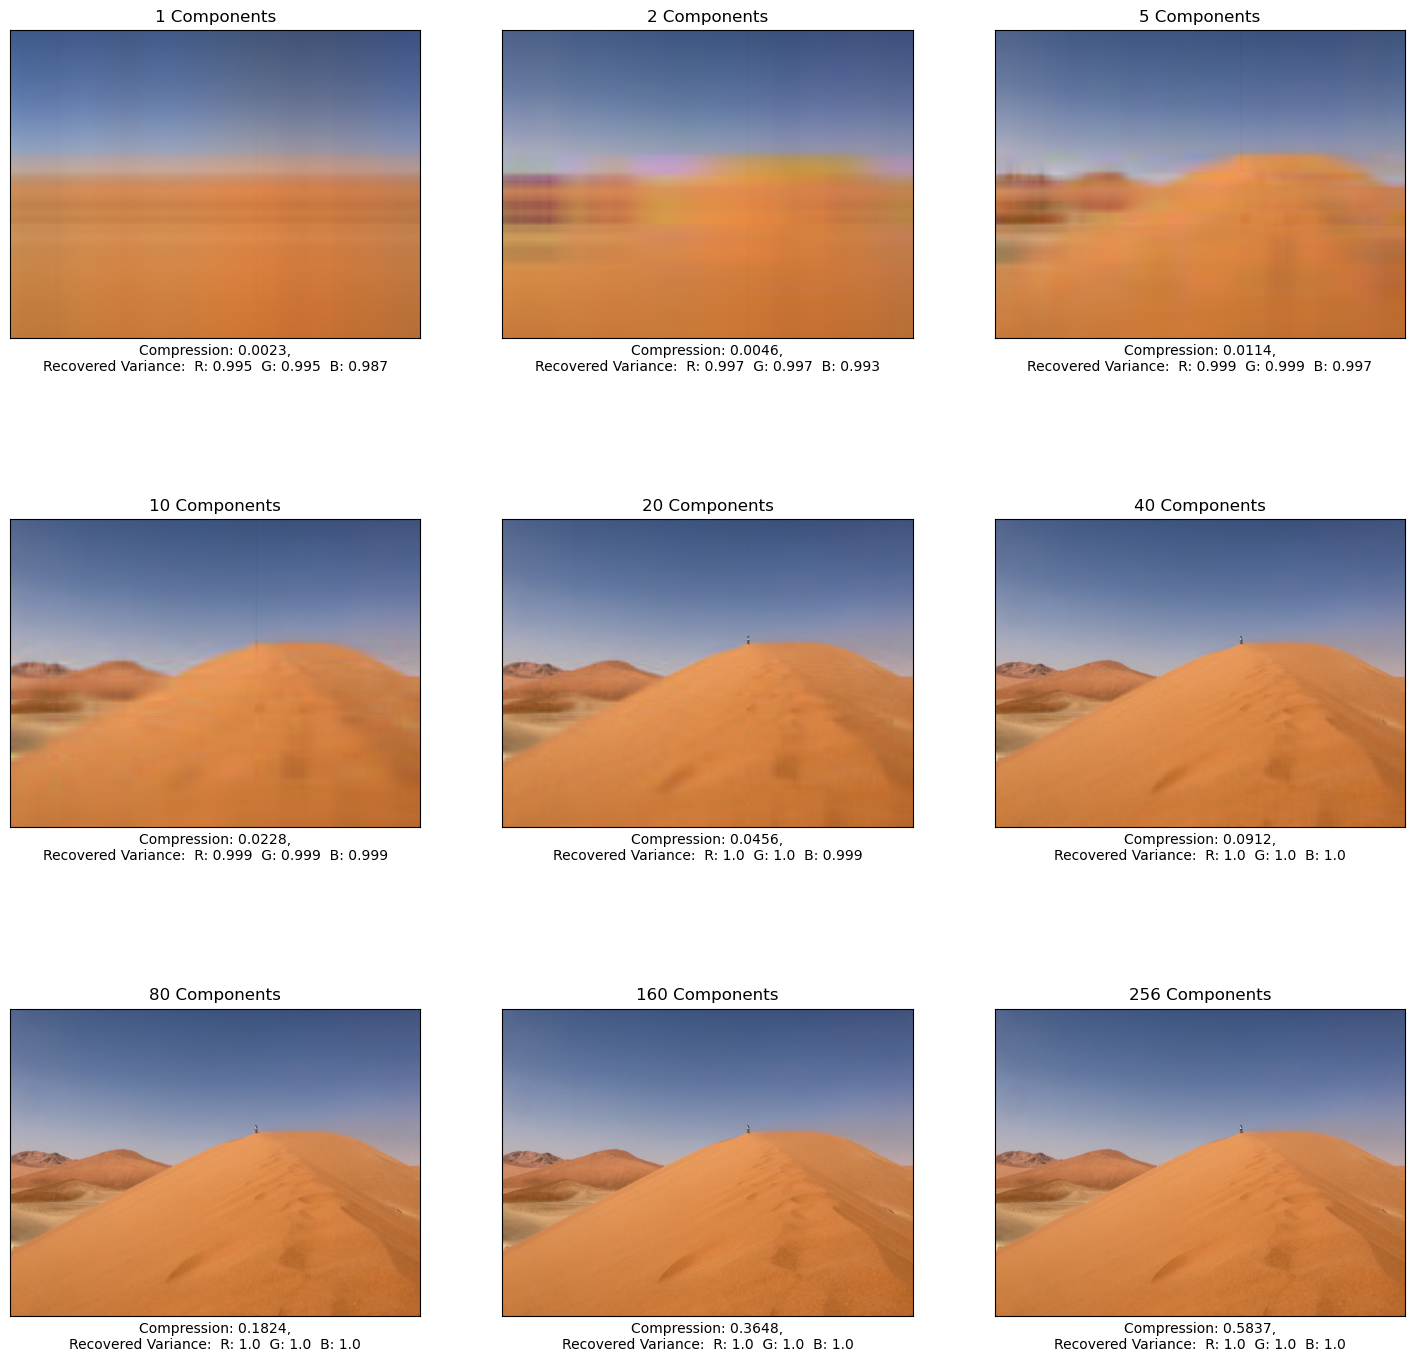

In [11]:
imcompression = ImgCompression()
U, S, V = imcompression.svd(image)
component_num = [1,2,5,10,20,40,80,160,256]

fig = plt.figure(figsize=(18, 18))

i=0
for k in component_num:
    img_rebuild = imcompression.rebuild_svd(U, S, V, k)
    c = np.around(imcompression.compression_ratio(image, k), 4)
    r = np.around(imcompression.recovered_variance_proportion(S, k), 3)
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow((img_rebuild * 255).astype(np.uint8))
    ax.set_title(f"{k} Components")
    ax.set_xlabel(f"Compression: {np.around(c,4)},\nRecovered Variance:  R: {r[0]}  G: {r[1]}  B: {r[2]}")
    i = i+1

## Ridge Regression

In [ ]:
import numpy as np

class Regression(object):
    
    def __init__(self):
        pass
    
    def rmse(self, pred, label): 

        return np.sqrt(np.mean(np.square(pred - label)))
    
    def construct_polynomial_feats(self, x, degree):

        return np.power(x.reshape(len(x), 1), np.arange(degree + 1))
    
    def predict(self, xtest, weight): 

        
        return np.matmul(xtest, weight)
    
    # closed form, gradient descent, and stochastic gradient descent  
    def ridge_fit_closed(self, xtrain, ytrain, c_lambda): # [5pts]

        n, d = xtrain.shape
        idy = np.eye(d)
        idy[0, 0] = 0
        pseudo_inv = np.linalg.pinv((xtrain.T @ xtrain) + (c_lambda * idy))
        return pseudo_inv @ xtrain.T @ ytrain
    
    def ridge_fit_GD(self, xtrain, ytrain, c_lambda, epochs=500, learning_rate=1e-7): 

        weight = np.zeros((xtrain.shape[1],1))
        for i in range(epochs):
            n = learning_rate / xtrain.shape[0]
            xweight = xtrain @ weight - ytrain
            m = xtrain.T @ xweight + c_lambda * weight
            d = n * m
            weight -= d
        return weight

    def ridge_fit_SGD(self, xtrain, ytrain, c_lambda, epochs=100, learning_rate=0.001): 
        
        weight = np.zeros((xtrain.shape[1],1))
        for i in range(epochs):
            for j in range(0,xtrain.shape[0]):
                p = xtrain[j]
                point = p.reshape(1,xtrain.shape[1])
                pweight = point @ weight
                y = pweight - ytrain[j]
                m = point.T @ y + c_lambda * weight
                d = learning_rate * m
                weight -= d
        return weight    
    